In [11]:
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd 
import seaborn as sns 
%matplotlib inline

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler,OneHotEncoder,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split,GridSearchCV

In [13]:
df=pd.read_csv('../datasets/Obesity Classification.csv')

In [14]:
df

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
...,...,...,...,...,...,...,...
103,106,11,Male,175,10,3.9,Underweight
104,107,16,Female,160,10,3.9,Underweight
105,108,21,Male,180,15,5.6,Underweight
106,109,26,Female,150,15,5.6,Underweight


In [15]:
X=df.drop(columns=['ID','Label'])

In [16]:
Y=df['Label']

In [17]:
numerical_data=X.select_dtypes(['number']).columns
categorical_data=X.select_dtypes(['object']).columns

In [18]:
xtr,xte,ytr,yte=train_test_split(X,Y,test_size=0.2,random_state=42)

In [19]:
preprocess=ColumnTransformer(transformers=[('encode',OneHotEncoder(),categorical_data),('scale',StandardScaler(),numerical_data)])

In [20]:
pipe=Pipeline([('preprocess',preprocess),('model',LogisticRegression(multi_class='multinomial'))])

In [21]:
pipe.fit(xtr,ytr)

c:\Users\RameshPatil\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('encode', OneHotEncoder(),
                                                  Index(['Gender'], dtype='object')),
                                                 ('scale', StandardScaler(),
                                                  Index(['Age', 'Height', 'Weight', 'BMI'], dtype='object'))])),
                ('model', LogisticRegression(multi_class='multinomial'))])

In [22]:
yp=pipe.predict(xte)

In [23]:
accuracy_score(yp,yte)

0.9545454545454546

In [24]:
confusion_matrix(yp,yte)

array([[6, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 1, 4, 0],
       [0, 0, 0, 8]], dtype=int64)

In [25]:
print(classification_report(yp,yte))

               precision    recall  f1-score   support

Normal Weight       1.00      1.00      1.00         6
        Obese       0.75      1.00      0.86         3
   Overweight       1.00      0.80      0.89         5
  Underweight       1.00      1.00      1.00         8

     accuracy                           0.95        22
    macro avg       0.94      0.95      0.94        22
 weighted avg       0.97      0.95      0.96        22



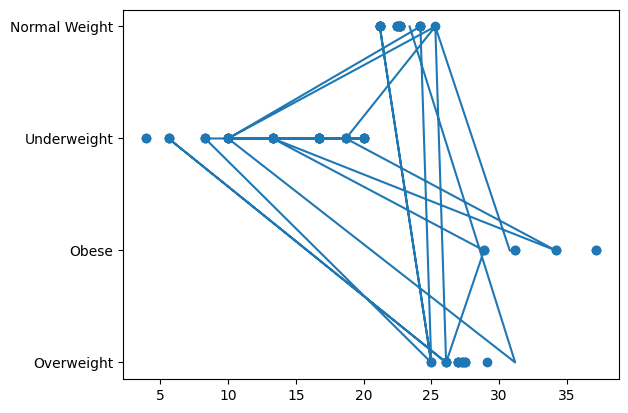

In [26]:
plt.scatter(xtr.iloc[:,-1],ytr)
plt.plot(xte.iloc[:,-1],yp)

In [28]:
xtest=df[:30]
xtest

,ID,Age,Gender,Height,Weight,BMI,Label
0,1,25,Male,175,80,25.3,Normal Weight
1,2,30,Female,160,60,22.5,Normal Weight
2,3,35,Male,180,90,27.3,Overweight
3,4,40,Female,150,50,20.0,Underweight
4,5,45,Male,190,100,31.2,Obese
5,6,50,Female,140,40,16.7,Underweight
6,7,55,Male,200,110,34.2,Obese
7,8,60,Female,130,30,13.3,Underweight
8,9,65,Male,210,120,37.2,Obese
9,10,70,Female,120,20,10.0,Underweight


In [33]:
xtest=xtest.sort_values(by='BMI', ascending=True)

In [34]:
xtest

,ID,Age,Gender,Height,Weight,BMI,Label
9,10,70,Female,120,20,10.0,Underweight
27,29,103,Female,130,30,13.3,Underweight
7,8,60,Female,130,30,13.3,Underweight
19,21,63,Female,120,30,13.3,Underweight
17,19,53,Female,130,40,16.7,Underweight
25,27,93,Female,140,40,16.7,Underweight
5,6,50,Female,140,40,16.7,Underweight
15,16,43,Female,140,50,20.0,Underweight
11,12,23,Female,160,50,20.0,Underweight
3,4,40,Female,150,50,20.0,Underweight


In [35]:
Y_test=xtest['Label']

In [36]:
X_test=xtest.drop(columns=['ID','Label'])

In [37]:
X_test

,Age,Gender,Height,Weight,BMI
9,70,Female,120,20,10.0
27,103,Female,130,30,13.3
7,60,Female,130,30,13.3
19,63,Female,120,30,13.3
17,53,Female,130,40,16.7
25,93,Female,140,40,16.7
5,50,Female,140,40,16.7
15,43,Female,140,50,20.0
11,23,Female,160,50,20.0
3,40,Female,150,50,20.0


In [38]:
Yp_test=pipe.predict(X_test)

Text(0.5, 1.0, 'LogisticRegression graph')

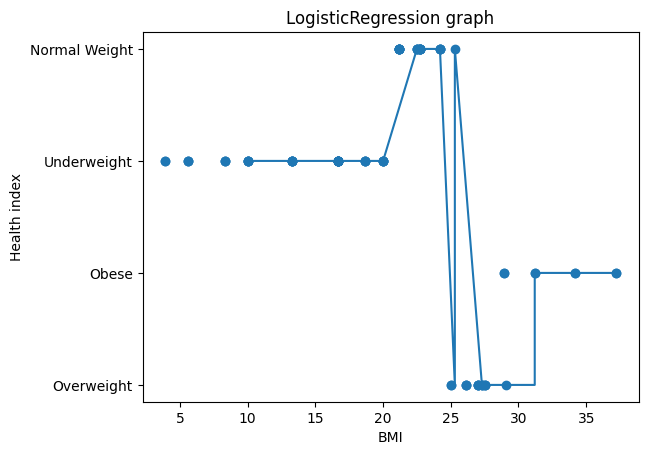

In [40]:
plt.scatter(xtr.iloc[:,-1],ytr)
plt.plot(X_test.iloc[:,-1],Yp_test)
plt.xlabel('BMI')
plt.ylabel('Health index')
plt.title('LogisticRegression graph')

In [41]:
accuracy_score(Yp_test,Y_test)

0.9333333333333333

Text(0.5, 1.0, 'confusion_matrix')

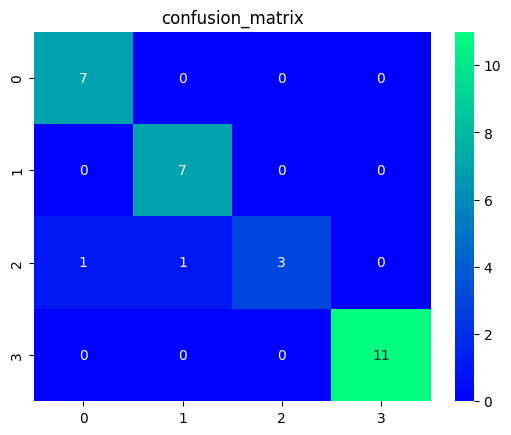

In [42]:
sns.heatmap(confusion_matrix(Yp_test,Y_test),annot=True,cmap='winter')
plt.title('confusion_matrix')